In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.ndimage.filters import gaussian_filter
from scipy.stats import kde

/var/folders/x4/xh6whfc524g20xpc32zdm38m0000gn/T/ipykernel_1728/1624714208.py:5: DeprecationWarning: Please use `gaussian_filter` from the `scipy.ndimage` namespace, the `scipy.ndimage.filters` namespace is deprecated.
  from scipy.ndimage.filters import gaussian_filter


In [8]:
# Create 2D histogram
# x=first col of values, y=second col of values, temp=temperature, R=Gas const
# pmf_max=max energy, bin_val=Total #bins, range_val= highest value amongst datasets

def cal_2d(x,y,temp,R,pmf_max,bin_val,r_val):
  
    H, xedges, yedges = np.histogram2d(x,y,density=True,bins=(bin_val,bin_val),range=([-1*r_val,r_val],[-1*r_val,r_val])) #[PC1,PC2] [x,y]
    
    stepx = xedges[1]-xedges[0]
    stepy = yedges[1]-yedges[0]
    xx, yy = np.mgrid[xedges.min():xedges.max():stepx,yedges.min():yedges.max():stepy]
    pos = np.dstack((xx, yy))
    
    pmax = 0
    for i in H:
        p = i.sum()
        if p >=pmax:
            pmax = p
    print("Found pmax = ",pmax)

    #Convert probabilities in H into energy values:
    for i in range(len(H)):
        for j in range(len(H.T)):
            if H[i,j]!=0:
                H[i,j]=-R*temp*np.log(H[i,j]/pmax)
            else:
                H[i,j]=pmf_max
                
    #print(" xedges, yedges, H = ",(H, xedges, yedges))
    
    return xedges,yedges,pos,H

In [9]:
def plot_emap(df,name,bins,range_val,cols,_cmap):
    
    xedges, yedges,pos,H=cal_2d(df[cols[0]],df[cols[1]],310,0.001987,6.0,bins,range_val) ##
    smoothing_factor = 0.6
    H = gaussian_filter(H,smoothing_factor)     
    plot = plt.contourf(pos[:,:,0],pos[:,:,1],H,extend='max',cmap=_cmap) #plasma
    plt.axhline(y = 0, color = 'black', linestyle = '-')
    plt.axvline(x = 0, color = 'black', linestyle = '-')
    
    plt.xlabel("φ[degrees]",fontsize=20)
    plt.xticks(fontsize=18)
    plt.xticks(rotation=30)
    #plt.ylim(-70,70)
    #plt.xlim(-70,70)
    plt.ylabel("ψ[degrees]",fontsize=20)
    plt.yticks(fontsize=18)
    plt.title(name,fontsize=20, weight='bold')

    cbar = plt.colorbar(plot, pad = 0.01, aspect = 35)
    cbar.set_label('kcal/mol',rotation=90,labelpad=5,fontsize=20)
    cbar.ax.tick_params(labelsize=18)
    cbar.minorticks_on()
    
    return plot

In [10]:
peptide_colors = ["#FFE4E1","#CD5C5C","#CD2626","#BFEFFF","#00BFFF","#104E8B"]
sys=["pkG","pkA","pkL","pkkg","pkka","pkkl"]
nms_A=["p(kG)","p(kA)","p(kL)","p(kKgKkG)","p(kKaKkA)","p(kKlKkL)"]
nms_B=["p(eG)","p(eA)","p(eL)","p(eEgEeG)","p(eEaEeA)","p(eElEeL)"]
dataA=[]
dataB=[]

for i in range(6):
    cols=["phi","psi"]
    tmp=pd.read_csv("dih_data/"+str(i)+"_A_"+sys[i]+".csv")
    dataA.append(tmp)
    tmp=pd.read_csv("dih_data/"+str(i)+"_B_"+sys[i]+".csv")
    dataB.append(tmp)


Found pmax =  0.002058600823045273


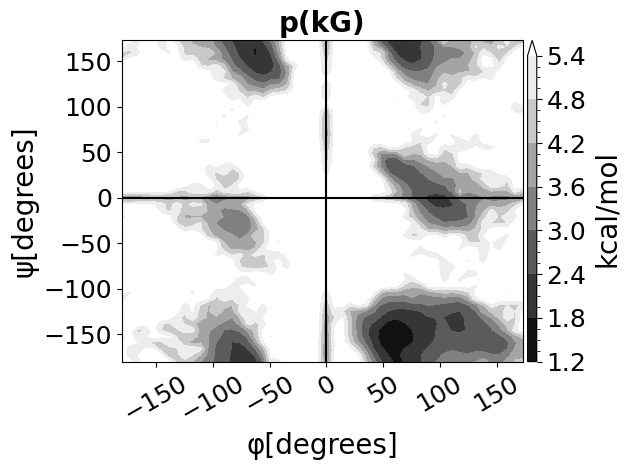

Found pmax =  0.0012657613168724283


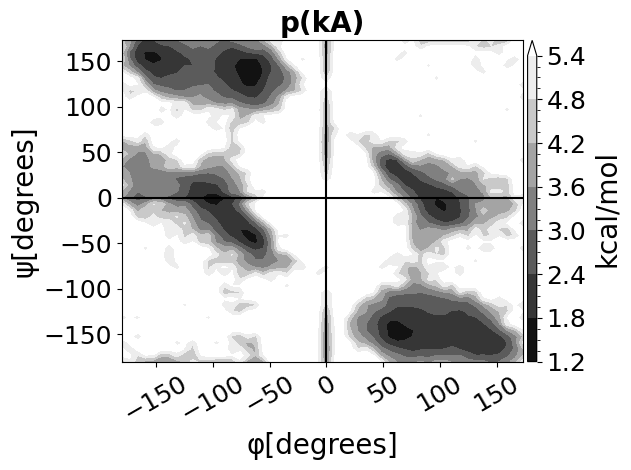

Found pmax =  0.0009980041152263378


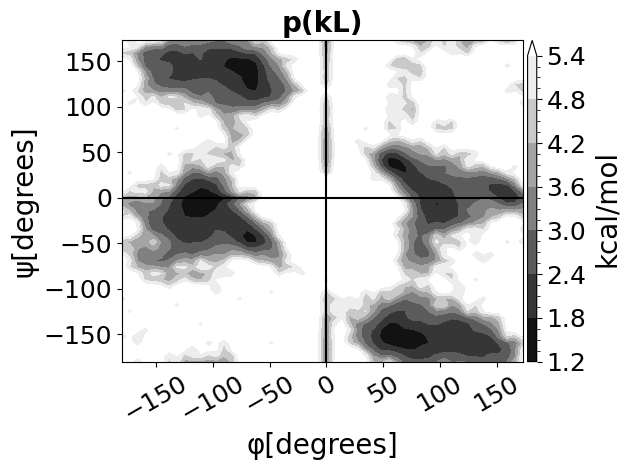

Found pmax =  0.0015908950617283958


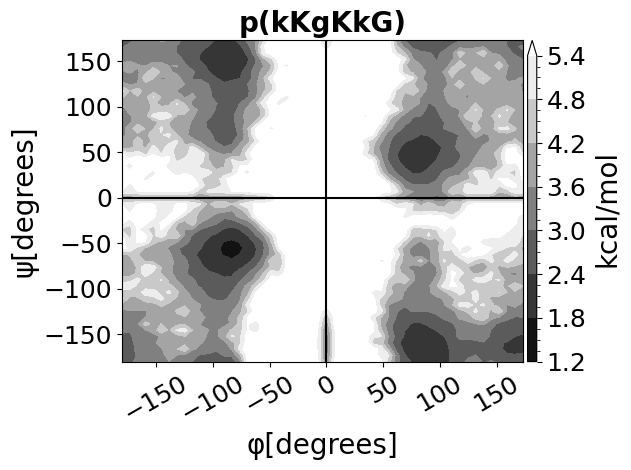

Found pmax =  0.001696954732510289


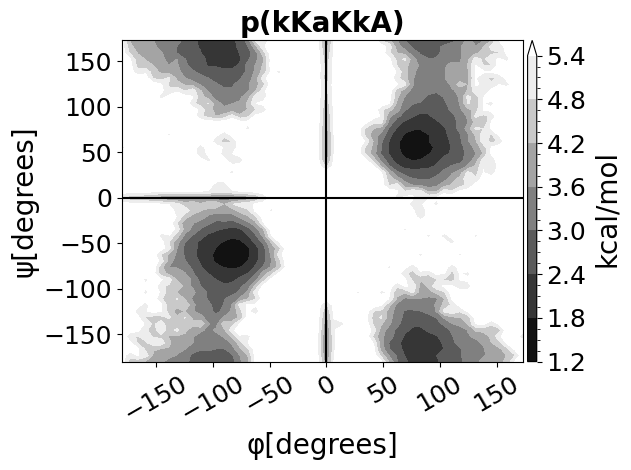

Found pmax =  0.0017404218106995926


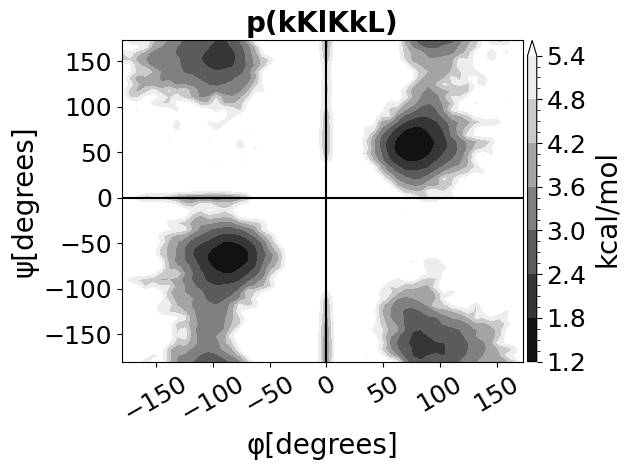

In [13]:
# Positive Strand:
for i in range(6):
    plt.clf()
    cols=["phi","psi"]
    df=dataA[i].tail(12000)
    
    df=pd.concat([df[cols[0]],df[cols[1]]],axis=1)
    plot_emap(df,nms_A[i],52,180,cols,"gray") #bins,range_val
    plt.tight_layout()
    plt.show()
    #plt.savefig(fname=sys[i]+"_A.png",dpi=700)

Found pmax =  0.0019960082304526796


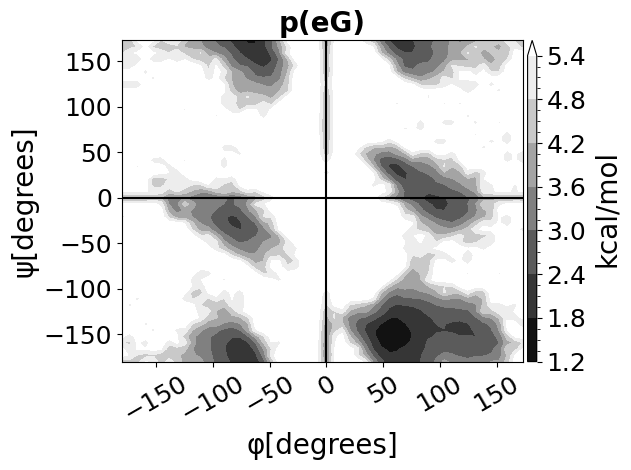

Found pmax =  0.0012953189300411528


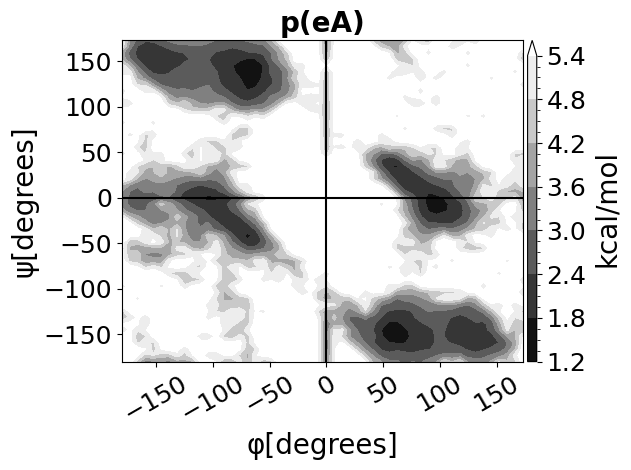

Found pmax =  0.0012831481481481485


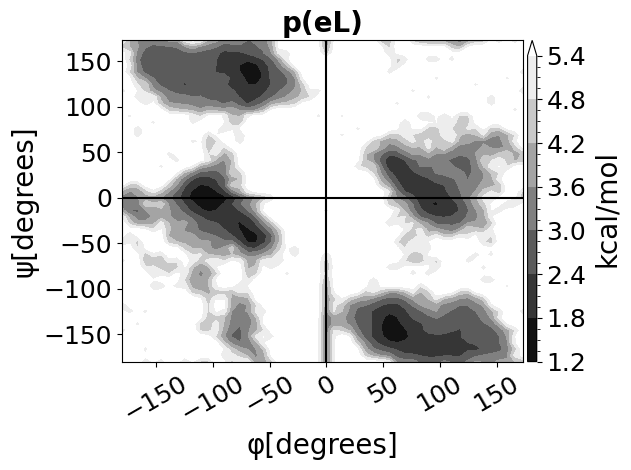

Found pmax =  0.0012605452674897151


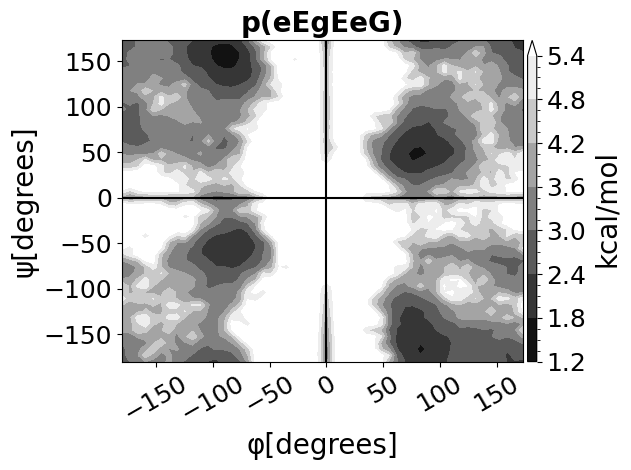

Found pmax =  0.001615236625514401


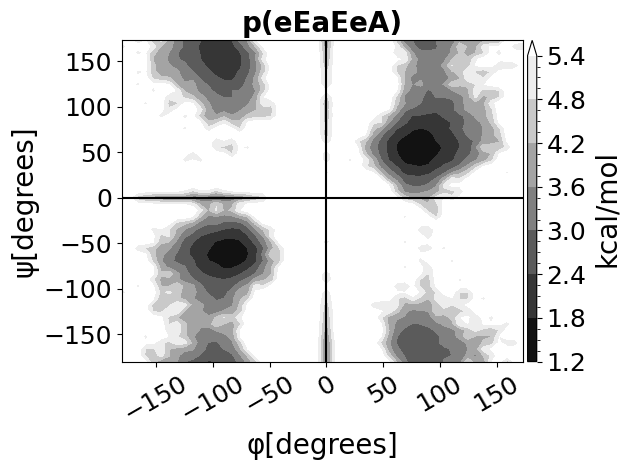

Found pmax =  0.0017160802469135847


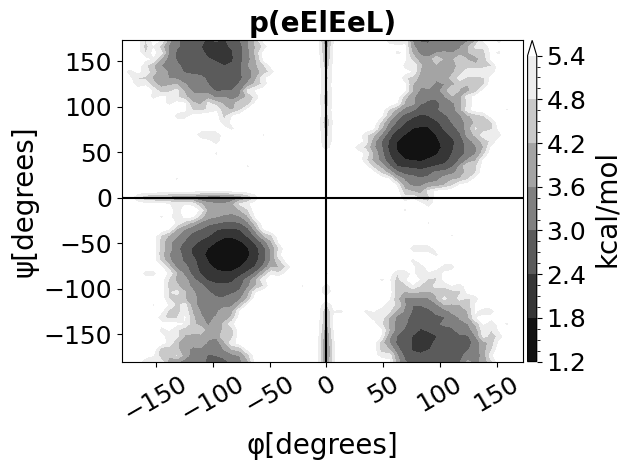

In [14]:
# Negative Strand:
for i in range(6):
    plt.clf()
    cols=["phi","psi"]
    df=dataB[i].tail(12000)
    
    df=pd.concat([df[cols[0]],df[cols[1]]],axis=1)
    plot_emap(df,nms_B[i],52,180,cols,"gray") #bins,range_val
    plt.tight_layout()
    plt.show()
    #plt.savefig(fname=sys[i]+"_B.png",dpi=700)